In [8]:
from wordcloud import WordCloud

In [9]:
# 한글 문장 리스트
sentences = [
    "오늘 날씨가 좋아서 나들이 가고 싶다.",
    "이 영화는 정말 재미있었어요.",
    "맛있는 음식을 먹으러 갈까요?",
    "운동을 하면 건강에 좋아지는 것 같아요.",
    "공부하기 싫어서 미루고 있어요.",
    "여행 계획을 세우고 있는데 어디로 갈까요?",
    "좋은 책을 읽으면 마음이 편안해져요.",
    "오늘은 친구들과 만나서 재미있게 놀았어요.",
    "새로운 언어를 배우는 것은 어려워도 흥미로워요.",
    "주말에 가족들과 함께 시간을 보내기로 했습니다."
]

### 조사 빼기 

In [18]:
from mecab import MeCab

In [19]:
mecab = MeCab()

In [20]:
## for문 돌려서 품사_tagging한다. 
mecab.nouns(sentences[0]) ## 명사 확인

['날씨', '나']

In [21]:
mecab.nouns(sentences[0]), mecab.nouns(sentences[1]), mecab.nouns(sentences[0]) + mecab.nouns(sentences[1]) 

(['날씨', '나'], ['영화'], ['날씨', '나', '영화'])

In [22]:
# 형태분석기 사용해 명사만 추출
morphs_list = list()
for sentence in sentences :
    morphs = mecab.nouns(sentence)
    morphs_list = morphs_list + morphs
morphs_list

['날씨',
 '나',
 '영화',
 '음식',
 '운동',
 '건강',
 '것',
 '공부',
 '여행',
 '계획',
 '어디',
 '책',
 '마음',
 '편안',
 '오늘',
 '친구',
 '언어',
 '것',
 '흥미',
 '주말',
 '가족',
 '시간']

In [23]:
mecab.pos(sentences[0]) ## 품사 확인

[('오늘', 'MAG'),
 ('날씨', 'NNG'),
 ('가', 'JKS'),
 ('좋', 'VA'),
 ('아서', 'EC'),
 ('나', 'NP'),
 ('들', 'XSN'),
 ('이', 'JKS'),
 ('가', 'VV'),
 ('고', 'EC'),
 ('싶', 'VX'),
 ('다', 'EF'),
 ('.', 'SF')]

- 느낌표 필요함_감성분석에 사용됨.
- UNKNOWN : matching때 확인 불가함. 

In [25]:
# "오늘 날씨가 좋아서 나들이 가고 싶다." -> 6개 
# "이 영화는 정말 재미있었어요." -> 4개 

# 문장으로 합치기
text = ' '.join(morphs)
text 

'주말 가족 시간'

In [26]:
# 단어로 쪼개기 
text_split = text.split()
text_split

['주말', '가족', '시간']

In [27]:
# counter를 이용해서 중복 여부 count
from collections import Counter
Counter(text_split)


Counter({'주말': 1, '가족': 1, '시간': 1})

In [28]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_text(text)

In [29]:
# count 
wordCloud.words_ 

{'주말': 1.0, '가족': 1.0, '시간': 1.0}

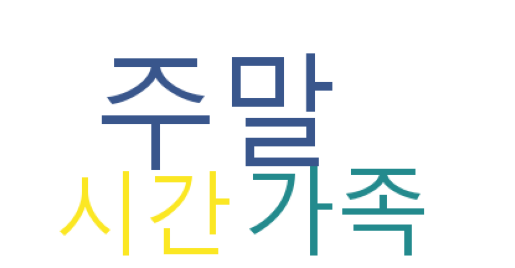

In [30]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()